# **Loading Complete Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

unclean_data=pd.read_csv('complete_dataset_uncleaned_new.csv')
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

data2.columns=c
data2.index=i
data2=data2.groupby('location').mean()
data2=data2.iloc[:,:-1]
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,
Afghanistan,0.000110,0.000450,0.188106,0.019696,0.353820,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Albania,0.002417,0.002831,0.184590,0.117952,0.551752,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000148,0.000360,0.177534,0.062370,0.626560,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Andorra,0.013005,0.004605,0.174567,0.222609,0.442219,0.007963,NaN,0.046144,0.236290,0.658314,0.427557,0.000000,0.909770
Angola,0.000073,0.000131,0.179183,0.049423,0.632435,0.001156,0.044363,0.304900,0.099865,NaN,NaN,0.000000,0.235136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.001372,0.002678,NaN,0.225971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.796534
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.507320
Yemen,0.000009,0.000161,0.164171,0.004195,0.335638,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


In [2]:
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
#import os
#os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
#import random
#random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
#import numpy as np
#np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [3]:
"""j=0
importance=pd.read_csv('importance.csv')
importance=np.array(importance)
for i in importance:
  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)
  j=j+1
data2"""

"j=0\nimportance=pd.read_csv('importance.csv')\nimportance=np.array(importance)\nfor i in importance:\n  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)\n  j=j+1\ndata2"

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [5]:
data2=clean_dataset(data2)
temp_df=data2.iloc[:,5:]
temp_df

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Albania,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Argentina,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835
Australia,0.000149,0.378308,0.044060,0.138118,0.293850,0.125000,0.278261,0.901105
Austria,0.005189,0.385084,0.102028,0.181449,0.644647,0.329545,0.534058,0.844338
...,...,...,...,...,...,...,...,...
Vanuatu,0.001096,0.019443,0.723870,0.373392,0.061503,0.380682,0.000000,0.513594
Vietnam,0.014990,0.047393,0.257493,0.169601,0.020501,0.542614,0.188406,0.660890
Yemen,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


# **Standardizing Data**

In [6]:
#data=clean_dataset(data.iloc[:,1:])
#data=pd.DataFrame(scaler.inverse_transform(scaled_data))
#data

In [7]:
Ind=pd.DataFrame(temp_df[temp_df.index=='Nigeria'])
Ind

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Nigeria,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127


# Finding Nearest Neighbour of Target Country

In [8]:
dist=[]
a=Ind
from scipy.spatial import distance
for index,row in temp_df.iterrows():
  row=pd.DataFrame(row)
  dst = distance.euclidean(a, row)
  dist.append(dst)

In [9]:
dst_target=pd.DataFrame(dist,temp_df.index)
dst_target.columns=['distance']
dst_target

,distance
location,
Albania,1.005471
Algeria,0.765251
Argentina,0.878246
Australia,1.018305
Austria,1.245403
...,...
Vanuatu,0.874610
Vietnam,0.831730
Yemen,0.678878


In [10]:
dst_target=dst_target.sort_values(by=['distance'])
dst_target

,distance
location,
Nigeria,0.000000
Benin,0.238547
Niger,0.260071
Mali,0.262218
Togo,0.285650
...,...
Greece,1.330621
Qatar,1.338360
South Korea,1.348985


In [11]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]
data = pd.read_csv('complete_dataset_cleaned_new.csv')
data.pop('Pkey')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data=data[data.location!='Romania']
data=data[data.location!='Latvia']
data=data[data.location!='Estonia']
data=data[data.location!='Ireland']
data=data[data.location!='Switzerland']
data=data[data.location!='Malta']

data=data.iloc[:,:-2]
data=data.iloc[:,1:]
data.head()
data

,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Algeria,7/17/2020,13.423,0.113,1.20,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.403
1,Algeria,7/18/2020,13.604,0.249,1.18,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.517
2,Algeria,7/20/2020,13.740,0.204,1.15,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.449
3,Algeria,7/21/2020,13.287,0.294,1.14,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.268
4,Algeria,7/22/2020,13.446,0.249,1.13,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23864,United States,4/26/2022,133.965,0.950,1.22,174.23,28.00,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.706
23865,United States,4/27/2022,266.521,2.386,1.21,174.37,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.706
23866,United States,4/28/2022,228.812,1.223,1.21,174.51,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.733
23867,United States,4/29/2022,181.817,1.255,1.20,174.67,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.822


In [12]:
temp=data.groupby('location').mean()
available=temp.index
available

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Bulgaria', 'Canada', 'Chile', 'Cyprus', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Luxembourg', 'Malaysia', 'Netherlands', 'Portugal', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'United Kingdom', 'United States'],
      dtype='object', name='location')

In [13]:
dst_target=dst_target.loc[dst_target.index.isin(available)]

In [14]:
dst_target

,distance
location,
South Africa,0.503781
Algeria,0.765251
Argentina,0.878246
Malaysia,0.957329
Canada,0.972862
Denmark,0.997821
United Kingdom,1.000548
Iceland,1.002557
Finland,1.007537


#**Selecting Closest Country**

In [15]:
c=dst_target.index
n1=c[0]

In [16]:
n1

'South Africa'

In [17]:
data1=data[data['location']==n1]
data1.pop('location')
data1.index=data1.date
data1.pop('date')
data1

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/5/2020,0.017,0.000,1.11,0.00,13.89,46.754,12294.876,200.38,5.52,8.1,33.2,2.32,64.13,0.000
3/7/2020,0.000,0.000,1.11,0.00,13.89,46.754,12294.876,200.38,5.52,8.1,33.2,2.32,64.13,0.000
3/8/2020,0.034,0.000,1.11,0.00,13.89,46.754,12294.876,200.38,5.52,8.1,33.2,2.32,64.13,0.000
3/9/2020,0.000,0.000,1.11,0.00,13.89,46.754,12294.876,200.38,5.52,8.1,33.2,2.32,64.13,0.000
3/10/2020,0.067,0.000,1.11,0.00,13.89,46.754,12294.876,200.38,5.52,8.1,33.2,2.32,64.13,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,85.230,0.253,1.48,58.36,36.11,46.754,12294.876,200.38,5.52,8.1,33.2,2.32,64.13,3.081
4/27/2022,107.270,0.051,1.46,58.47,36.10,46.754,12294.876,200.38,5.52,8.1,33.2,2.32,64.13,3.182
4/28/2022,69.807,0.067,1.43,58.49,36.10,46.754,12294.876,200.38,5.52,8.1,33.2,2.32,64.13,3.233


In [18]:
a=data1.index
b=data1.columns
data1=pd.DataFrame(scaler.transform(data1))
data1.index=a
data1.columns=b
df=data1.iloc[:,[0,1,2,3,4,5,13]]
df=clean_dataset(df)
df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/5/2020,3.338250e-07,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
3/7/2020,0.000000e+00,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
3/8/2020,6.676500e-07,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
3/9/2020,0.000000e+00,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
3/10/2020,1.315663e-06,0.000000,0.198261,0.000000,0.1389,0.002269,0.000000
...,...,...,...,...,...,...,...
4/26/2022,1.673641e-03,0.000457,0.262609,0.159075,0.3611,0.002269,0.017080
4/27/2022,2.106436e-03,0.000092,0.259130,0.159375,0.3610,0.002269,0.017640
4/28/2022,1.370784e-03,0.000121,0.253913,0.159430,0.3610,0.002269,0.017923


In [19]:
#data2=unclean_data.iloc[:,3:]
#data2.head()

# **Plot Your Data**

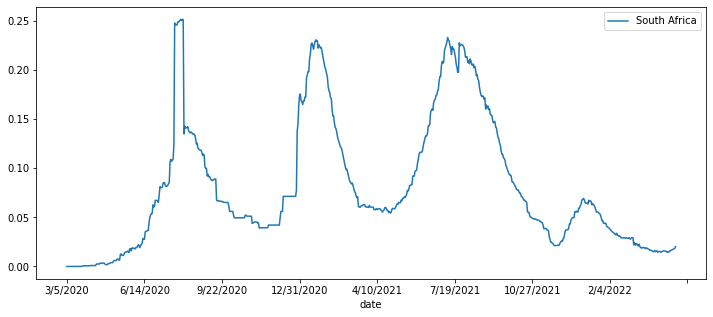

In [20]:
df.icu_patients_per_million.plot(figsize=(12,5), label=n1)
plt.legend(loc="upper right")


# **Check For Stationarity**

In [21]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [22]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -2.8223766208022245
2. P-Value :  0.055147833408730196
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 766
5. Critical Values :
	 1% :  -3.438915730045254
	 5% :  -2.8653205426302253
	 10% :  -2.5687831424305845


# **Model for country 1**

In [23]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
#stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True, suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df.shape)
train=df.iloc[:-90,:]
test=df.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(786, 7)
(696, 7) (90, 7)


90
0.04913512408519504


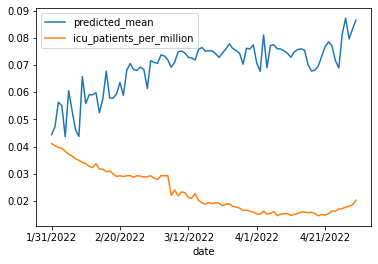

In [26]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,3),seasonal_order=(0,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [27]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,3),seasonal_order=(0,0,0,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.002


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
35/35 [==============================] - 1s 4ms/step - loss: 1.9166e-04
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 1.9144e-04
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 1.9081e-04
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 1.9192e-04
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 1.9118e-04
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 1.9114e-04
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 1.9153e-04
Epoch 8/100
35/35 [==============================] - 0s 5ms/step - loss: 1.9039e-04
Epoch 9/100
35/35 [==============================] - 0s 5ms/step - loss: 1.9045e-04
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 1.9017e-04
Epoch 11/100
35/35 [==============================] - 0s 4ms/step - loss: 1.9002e-04
Epoch 12/100
35/35 [==============================] - 0s 5ms/step - loss: 

3/3 [==============================] - 0s 6ms/step


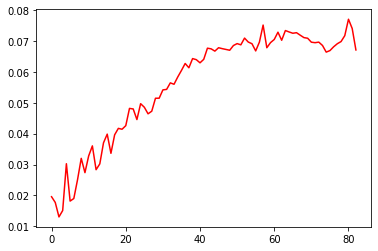

Test MSE: 0.012


In [29]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

In [30]:
pred

,0
0,0.019558
1,0.017691
2,0.012999
3,0.015069
4,0.030255
...,...
78,0.069899
79,0.071809
80,0.077138
81,0.074142


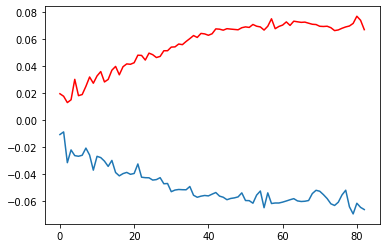

Test MSE: 0.012


In [31]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.011


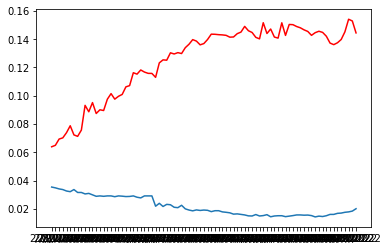

In [32]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 1NN**


In [33]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [34]:
data4=unclean_data[unclean_data.location=='Nigeria']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
2/28/2020    2/28/2020
2/29/2020    2/29/2020
3/1/2020      3/1/2020
3/2/2020      3/2/2020
3/3/2020      3/3/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 793, dtype: object

In [35]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b


In [36]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]


In [37]:
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
2/28/2020,9.818382e-08,NaN,NaN,NaN,0.1111,0.010194,NaN
2/29/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,NaN
3/1/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,NaN
3/2/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,NaN
3/3/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,NaN
...,...,...,...,...,...,...,...
4/26/2022,0.000000e+00,0.0,0.194783,0.047946,0.3592,0.010194,NaN
4/27/2022,0.000000e+00,0.0,0.198261,NaN,0.3592,0.010194,NaN
4/28/2022,2.847331e-06,0.0,0.201739,NaN,0.3592,0.010194,NaN


In [38]:
df=df.iloc[:,:-1]
df=clean_dataset(df)

#Severity
df.iloc[:,1]=df.iloc[:,1]*10
#reproduction rate
#df.iloc[:,2]=df.iloc[:,2]*2

traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

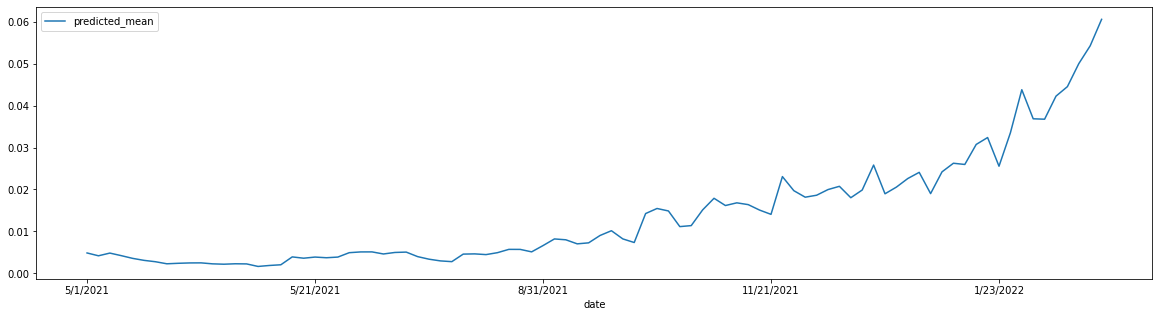

In [39]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,3),seasonal_order=(0,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [40]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
pred


,predicted_mean
date,
5/8/2021,0.002289
5/9/2021,0.002407
5/10/2021,0.002491
5/11/2021,0.002508
5/12/2021,0.002277
...,...
3/13/2022,0.042255
3/18/2022,0.044520
3/27/2022,0.050005


In [41]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.02184677]
[0.02009799]
[0.01548994]
[0.01757661]
[0.03253248]
[0.02032278]
[0.02126208]
[0.02731264]
[0.03365783]
[0.02924985]
[0.03483655]
[0.03997595]
[0.03194228]
[0.03409136]
[0.04077861]
[0.04374813]
[0.0385715]
[0.04475877]
[0.04685311]
[0.04607585]
[0.04759509]
[0.05328156]
[0.0520293]
[0.04796923]
[0.05271751]
[0.05137972]
[0.05105376]
[0.05195284]
[0.05598304]
[0.05645546]
[0.05994471]
[0.0600895]
[0.06162618]
[0.06266993]
[0.0666143]
[0.06853103]
[0.06982919]
[0.06867225]
[0.07340782]
[0.07419563]
[0.0712191]
[0.07148702]
[0.0820122]
[0.08300591]
[0.08167761]
[0.07905045]
[0.07898366]
[0.08246769]
[0.08498012]
[0.08478556]
[0.08605094]
[0.08523062]
[0.08611004]
[0.08381308]
[0.09226783]
[0.08658482]
[0.08788346]
[0.09388263]
[0.08787788]
[0.09031854]
[0.08861286]
[0.09281098]
[0.09614281]
[0.09244686]
[0.09358449]
[0.09521407]
[0.09686251]
[0.09098427]
[0.09538325]
[0.09723115]
[0.09566038]
[0.10027486]
[0.10210124]
[0.09417633]
[0.0999929]
[0.11075376]
[0.10505624]
[0.105

In [42]:
p1=pred_final

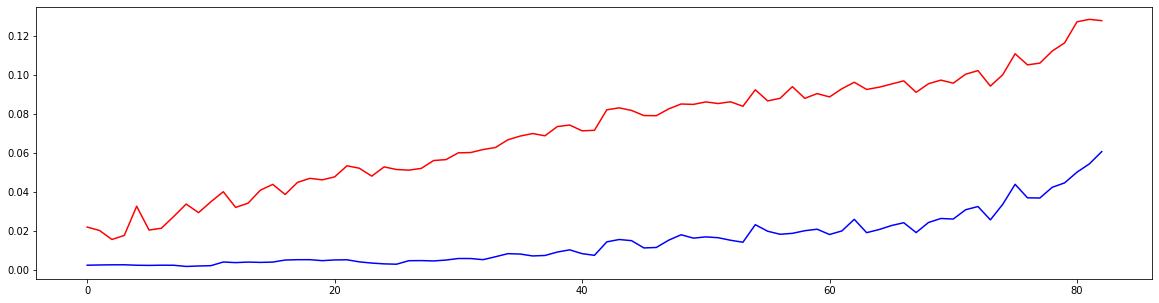

In [43]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 2**

In [44]:
n2=c[1]
n2

'Algeria'

In [45]:
data5=data[data['location']==n2]
data5.pop('location')
data5.index=data5.date
data5.pop('date')

date
7/17/2020    7/17/2020
7/18/2020    7/18/2020
7/20/2020    7/20/2020
7/21/2020    7/21/2020
7/22/2020    7/22/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 588, dtype: object

In [46]:
a=data5.index
b=data5.columns
data5=pd.DataFrame(scaler.transform(data5))
data5.index=a
data5.columns=b
df2=data5.iloc[:,[0,1,2,3,4,5,13]]
df2=clean_dataset(df2)
df2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
7/17/2020,2.635843e-04,0.000204,0.213913,0.0,0.7407,0.000838,0.007778
7/18/2020,2.671385e-04,0.000450,0.210435,0.0,0.7407,0.000838,0.008410
7/20/2020,2.698091e-04,0.000368,0.205217,0.0,0.7407,0.000838,0.008033
7/21/2020,2.609137e-04,0.000531,0.203478,0.0,0.7407,0.000838,0.007029
7/22/2020,2.640359e-04,0.000450,0.201739,0.0,0.7407,0.000838,0.006397
...,...,...,...,...,...,...,...
4/26/2022,4.516456e-07,0.000000,0.140870,0.0,0.4532,0.000838,0.000128
4/27/2022,4.516456e-07,0.000000,0.133913,0.0,0.4532,0.000838,0.000128
4/28/2022,1.335300e-06,0.000000,0.128696,0.0,0.4532,0.000838,0.000128


In [47]:
#stepwise_fit = auto_arima(df2['icu_patients_per_million'],exog=df2.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df2.shape)
train=df2.iloc[:-90,:]
test=df2.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(588, 7)
(498, 7) (90, 7)


90
0.0016420824288835283


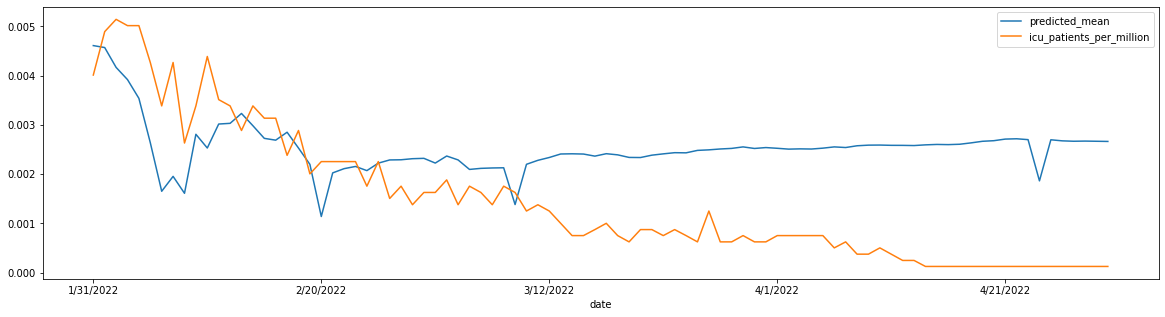

In [48]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,2),seasonal_order=(1,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df2.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [49]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,2),seasonal_order=(1,0,0,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.000


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [50]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7616e-07
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7229e-07
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 3.6933e-07
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6783e-07
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6621e-07
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6466e-07
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6327e-07
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6206e-07
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 3.6115e-07
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6032e-07
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 3.5928e-07
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 

3/3 [==============================] - 0s 4ms/step


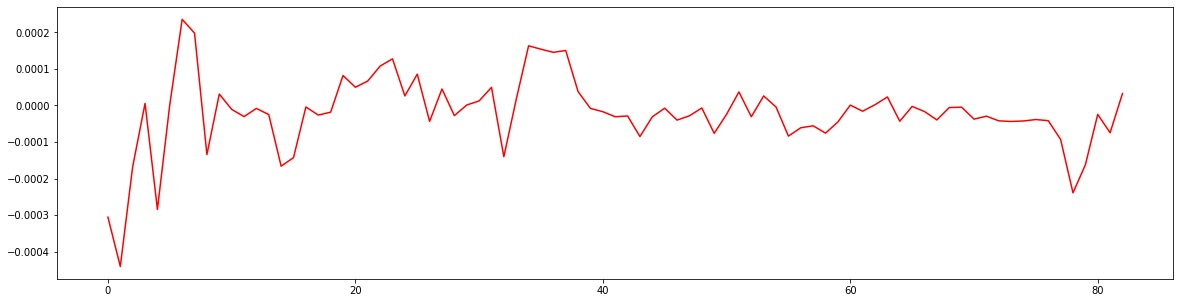

Test MSE: 0.000


In [51]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

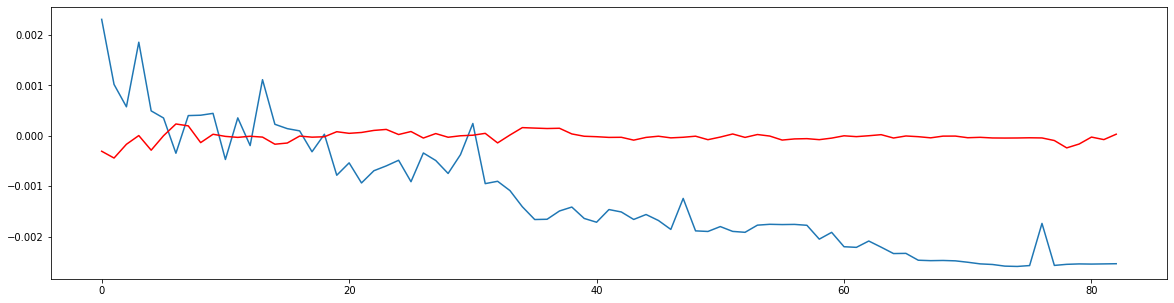

Test MSE: 0.000


In [52]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.000


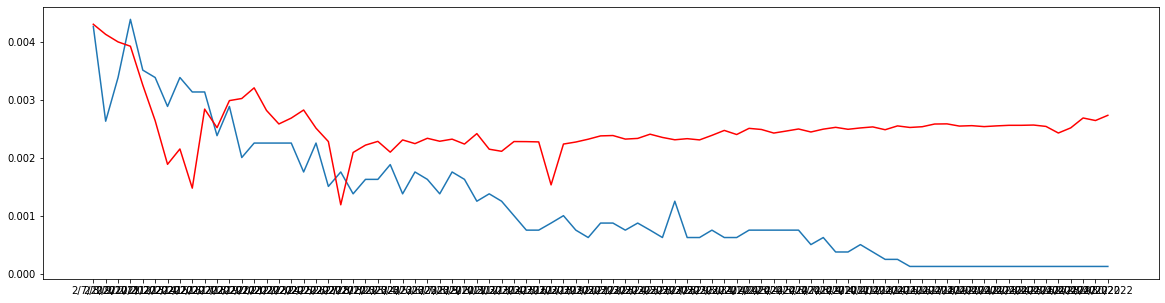

In [53]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 2NN**


In [54]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [55]:
data4=unclean_data[unclean_data.location=='Nigeria']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2/28/2020,0.005,NaN,NaN,NaN,11.11,209.588,5338.454,181.013,2.42,0.6,10.8,0.0,54.69,NaN
2/29/2020,0.000,NaN,NaN,NaN,11.11,209.588,5338.454,181.013,2.42,0.6,10.8,0.0,54.69,NaN
3/1/2020,0.000,NaN,NaN,NaN,11.11,209.588,5338.454,181.013,2.42,0.6,10.8,0.0,54.69,NaN
3/2/2020,0.000,NaN,NaN,NaN,11.11,209.588,5338.454,181.013,2.42,0.6,10.8,0.0,54.69,NaN
3/3/2020,0.000,NaN,NaN,NaN,11.11,209.588,5338.454,181.013,2.42,0.6,10.8,0.0,54.69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,0.000,0.0,1.09,17.59,35.92,209.588,5338.454,181.013,2.42,0.6,10.8,0.0,54.69,NaN
4/27/2022,0.000,0.0,1.11,NaN,35.92,209.588,5338.454,181.013,2.42,0.6,10.8,0.0,54.69,NaN
4/28/2022,0.145,0.0,1.13,NaN,35.92,209.588,5338.454,181.013,2.42,0.6,10.8,0.0,54.69,NaN


In [56]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2/28/2020,9.818382e-08,NaN,NaN,NaN,0.1111,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127,NaN
2/29/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127,NaN
3/1/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127,NaN
3/2/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127,NaN
3/3/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,0.000000e+00,0.0,0.194783,0.047946,0.3592,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127,NaN
4/27/2022,0.000000e+00,0.0,0.198261,NaN,0.3592,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127,NaN
4/28/2022,2.847331e-06,0.0,0.201739,NaN,0.3592,0.010194,0.040226,0.157575,0.048409,0.01139,0.044034,0.0,0.042127,NaN


In [57]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
2/28/2020,9.818382e-08,NaN,NaN,NaN,0.1111,0.010194,NaN
2/29/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,NaN
3/1/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,NaN
3/2/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,NaN
3/3/2020,0.000000e+00,NaN,NaN,NaN,0.1111,0.010194,NaN
...,...,...,...,...,...,...,...
4/26/2022,0.000000e+00,0.0,0.194783,0.047946,0.3592,0.010194,NaN
4/27/2022,0.000000e+00,0.0,0.198261,NaN,0.3592,0.010194,NaN
4/28/2022,2.847331e-06,0.0,0.201739,NaN,0.3592,0.010194,NaN


In [58]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
#Severity
df.iloc[:,1]=df.iloc[:,1]*10

#Reproduction Rate
#df.iloc[:,2]=df.iloc[:,2]*2


In [59]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

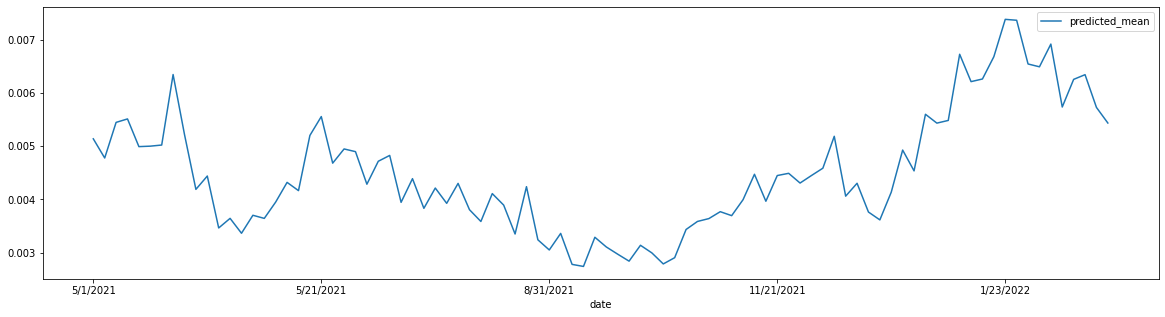

In [60]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(1,0,2),seasonal_order=(1,0,0,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [61]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -0.000306
1    -0.000440
2    -0.000168
3     0.000006
4    -0.000284
        ...   
78   -0.000239
79   -0.000162
80   -0.000024
81   -0.000075
82    0.000033
Name: 0, Length: 83, dtype: float32

In [62]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.00604038]
[0.00477832]
[0.00402041]
[0.00444425]
[0.0031781]
[0.00364537]
[0.00359872]
[0.00389895]
[0.00350835]
[0.00398097]
[0.0043086]
[0.00413389]
[0.00519332]
[0.00553114]
[0.00451466]
[0.00480484]
[0.00489268]
[0.00425857]
[0.00469772]
[0.0049078]
[0.00399403]
[0.00445604]
[0.00393964]
[0.00434035]
[0.00395157]
[0.0043857]
[0.00376228]
[0.0036295]
[0.00408049]
[0.00389319]
[0.00336144]
[0.00428816]
[0.00310002]
[0.00306592]
[0.00352336]
[0.00293201]
[0.00288476]
[0.00343816]
[0.00314383]
[0.0029621]
[0.00282188]
[0.00310621]
[0.00296506]
[0.00270155]
[0.00287299]
[0.00342651]
[0.00354501]
[0.00361065]
[0.00376173]
[0.00361776]
[0.00397027]
[0.00450854]
[0.0039341]
[0.00447381]
[0.00448525]
[0.00422299]
[0.00438729]
[0.00453008]
[0.00510961]
[0.00401558]
[0.00430343]
[0.00374607]
[0.0036164]
[0.00415897]
[0.00488364]
[0.00453273]
[0.00558258]
[0.00539343]
[0.0054778]
[0.00672228]
[0.00617529]
[0.00623312]
[0.00663941]
[0.00733932]
[0.00732373]
[0.00650578]
[0.00644979]
[0.00682

In [63]:
p2=pred_final

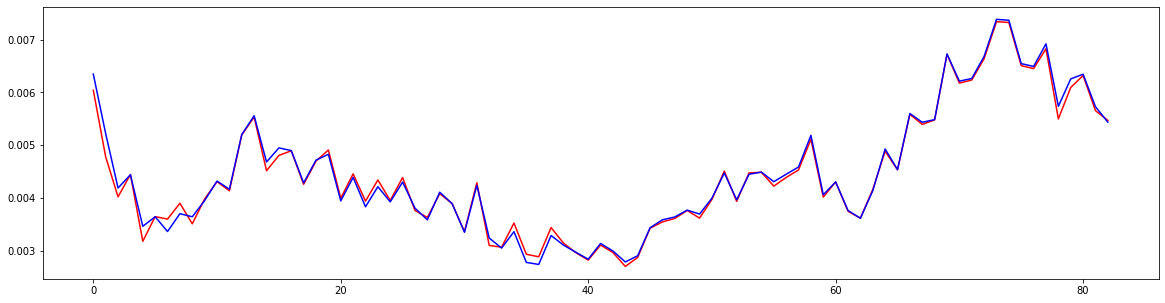

In [64]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 3**

In [65]:
n3=c[2]
n3

'Argentina'

In [66]:
data6=data[data['location']==n3]
data6.pop('location')
data6.index=data6.date
data6.pop('date')
data6

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
7/1/2020,58.904,0.972,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,12.722
7/2/2020,60.605,0.751,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,13.119
7/3/2020,62.836,1.148,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,13.694
7/4/2020,57.204,0.972,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,14.069
7/5/2020,53.869,0.574,1.19,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,14.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/14/2022,31.539,0.464,0.55,216.53,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100
4/15/2022,13.097,0.464,0.47,216.55,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100
4/16/2022,12.170,0.375,0.40,216.60,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100


In [67]:
a=data6.index
b=data6.columns
data6=pd.DataFrame(scaler.transform(data6))
data6.index=a
data6.columns=b
df3=data6.iloc[:,[0,1,2,3,4,5,13]]
df3=clean_dataset(df3)
df3

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
7/1/2020,0.001157,0.001755,0.210435,0.000000,0.9259,0.000781,0.070526
7/2/2020,0.001190,0.001356,0.210435,0.000000,0.9259,0.000781,0.072727
7/3/2020,0.001234,0.002073,0.210435,0.000000,0.9259,0.000781,0.075915
7/4/2020,0.001123,0.001755,0.210435,0.000000,0.9259,0.000781,0.077993
7/5/2020,0.001058,0.001036,0.212174,0.000000,0.9259,0.000781,0.080566
...,...,...,...,...,...,...,...
4/14/2022,0.000619,0.000838,0.100870,0.590209,0.1767,0.000781,0.050447
4/15/2022,0.000257,0.000838,0.086957,0.590264,0.1767,0.000781,0.050447
4/16/2022,0.000239,0.000677,0.074783,0.590400,0.1767,0.000781,0.050447


In [68]:
#stepwise_fit = auto_arima(df3['icu_patients_per_million'],exog=df3.iloc[:,0:4], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df3.shape)
train=df3.iloc[:-90,:]
test=df3.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(647, 7)
(557, 7) (90, 7)


90
0.23347297213786053


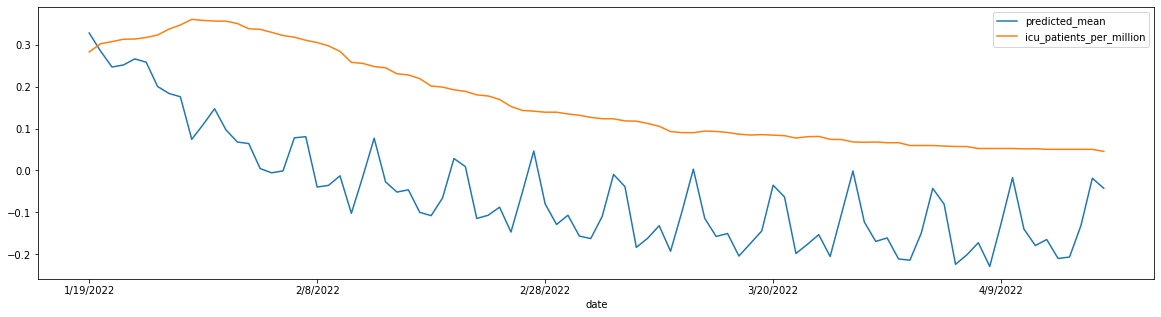

In [69]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,4),seasonal_order=(2,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df3.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [70]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,4),seasonal_order=(2,0,1,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.055


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [71]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
28/28 [==============================] - 0s 2ms/step - loss: 3.1298e-04
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 3.0985e-04
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 3.0732e-04
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 3.0490e-04
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 3.0312e-04
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 3.0116e-04
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 2.9936e-04
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 2.9751e-04
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 2.9591e-04
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 2.9458e-04
Epoch 11/100
28/28 [==============================] - 0s 2ms/step - loss: 2.9320e-04
Epoch 12/100
28/28 [==============================] - 0s 2ms/step - loss: 

3/3 [==============================] - 0s 4ms/step


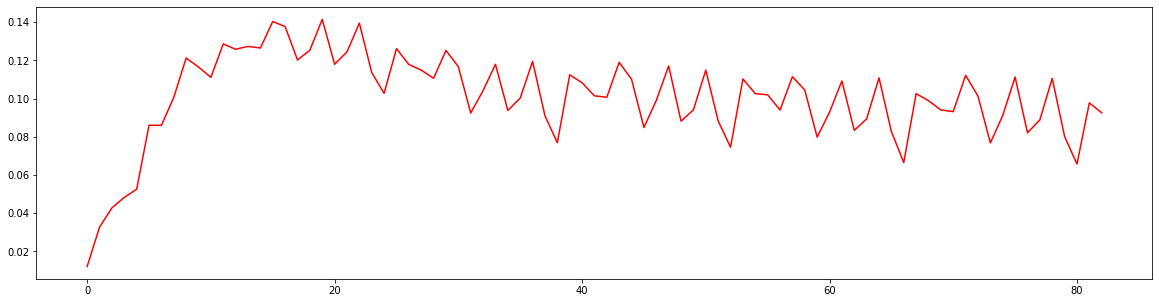

Test MSE: 0.022


In [72]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

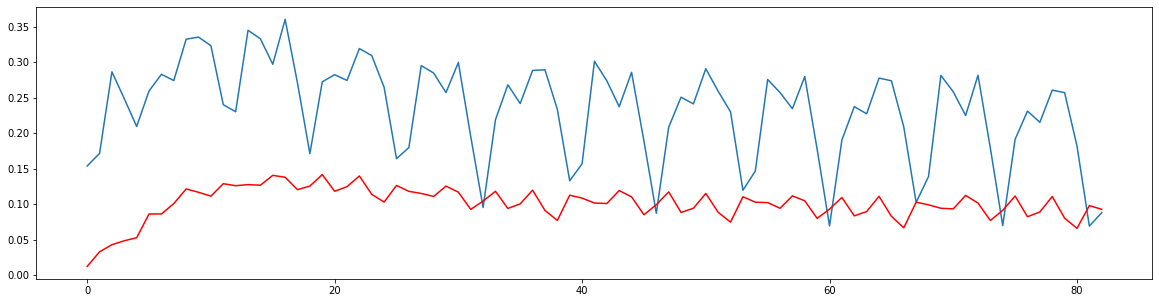

Test MSE: 0.022


In [73]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.020


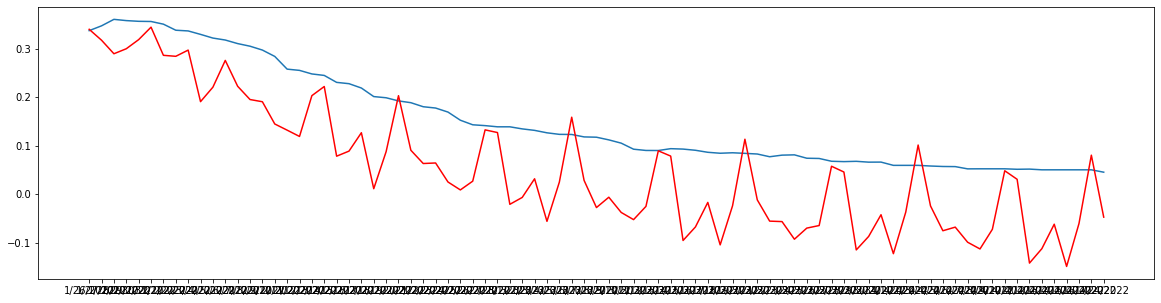

In [74]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 3NN**


In [75]:
data4=unclean_data[unclean_data.location=='Nigeria']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
2/28/2020    2/28/2020
2/29/2020    2/29/2020
3/1/2020      3/1/2020
3/2/2020      3/2/2020
3/3/2020      3/3/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 793, dtype: object

In [76]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b

In [77]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]

In [78]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
#Severity
df.iloc[:,1]=df.iloc[:,1]*10

#Reproduction Rate
#df.iloc[:,2]=df.iloc[:,2]*2


In [79]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

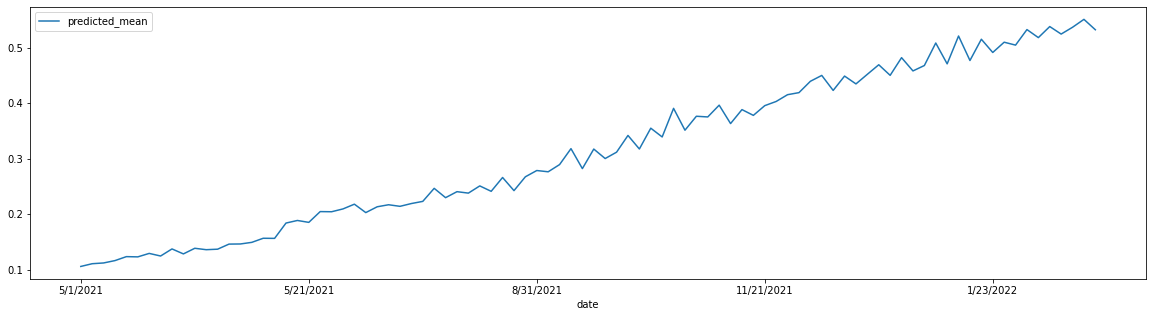

In [80]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,4),seasonal_order=(2,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [81]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0     0.012120
1     0.032696
2     0.042788
3     0.048288
4     0.052565
        ...   
78    0.110605
79    0.080168
80    0.065729
81    0.097772
82    0.092577
Name: 0, Length: 83, dtype: float32

In [82]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.13660919]
[0.16996616]
[0.17107429]
[0.18672952]
[0.18845297]
[0.22284788]
[0.23197325]
[0.24687718]
[0.27038]
[0.27304358]
[0.26741525]
[0.31254746]
[0.31441768]
[0.31251183]
[0.33107798]
[0.34470421]
[0.34713159]
[0.33819346]
[0.32812753]
[0.35477163]
[0.33489999]
[0.33853856]
[0.35865982]
[0.3366418]
[0.34924895]
[0.35587184]
[0.35837369]
[0.35282797]
[0.36155202]
[0.36637997]
[0.38278179]
[0.33487523]
[0.37155754]
[0.39658683]
[0.37016427]
[0.38963284]
[0.43759077]
[0.37312067]
[0.39424596]
[0.41271137]
[0.42000221]
[0.44333048]
[0.41818513]
[0.47398403]
[0.4493045]
[0.47560133]
[0.45039848]
[0.49359604]
[0.46341725]
[0.49060283]
[0.47823356]
[0.47678445]
[0.45262295]
[0.50589142]
[0.50576335]
[0.5173728]
[0.51309612]
[0.55097811]
[0.55461297]
[0.50288407]
[0.54179908]
[0.5440632]
[0.535514]
[0.55873052]
[0.56109982]
[0.56488622]
[0.5247257]
[0.57055675]
[0.60742477]
[0.5650207]
[0.61433635]
[0.58919617]
[0.61663861]
[0.56828852]
[0.60117927]
[0.6160359]
[0.61487857]
[0.60714914

In [83]:
p3=pred_final
pred_final

[array([0.13660919]),
 array([0.16996616]),
 array([0.17107429]),
 array([0.18672952]),
 array([0.18845297]),
 array([0.22284788]),
 array([0.23197325]),
 array([0.24687718]),
 array([0.27038]),
 array([0.27304358]),
 array([0.26741525]),
 array([0.31254746]),
 array([0.31441768]),
 array([0.31251183]),
 array([0.33107798]),
 array([0.34470421]),
 array([0.34713159]),
 array([0.33819346]),
 array([0.32812753]),
 array([0.35477163]),
 array([0.33489999]),
 array([0.33853856]),
 array([0.35865982]),
 array([0.3366418]),
 array([0.34924895]),
 array([0.35587184]),
 array([0.35837369]),
 array([0.35282797]),
 array([0.36155202]),
 array([0.36637997]),
 array([0.38278179]),
 array([0.33487523]),
 array([0.37155754]),
 array([0.39658683]),
 array([0.37016427]),
 array([0.38963284]),
 array([0.43759077]),
 array([0.37312067]),
 array([0.39424596]),
 array([0.41271137]),
 array([0.42000221]),
 array([0.44333048]),
 array([0.41818513]),
 array([0.47398403]),
 array([0.4493045]),
 array([0.47560

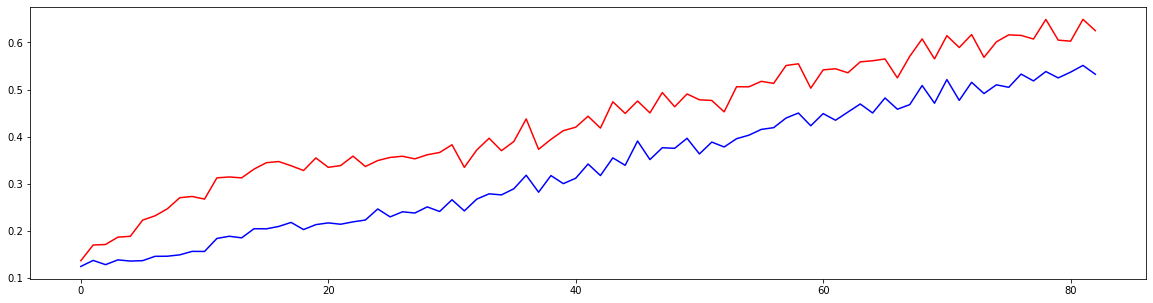

In [84]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

#**Exporting Results**

In [85]:
tmp=data1.iloc[-83:,:]

In [86]:
p1=list(p1)
p2=list(p2)
p3=list(p3)

In [87]:
tmp

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2/7/2022,0.000406,0.005655,0.161739,0.000000,0.4444,0.002269,0.100053,0.187599,0.153351,0.182232,0.362216,0.168116,0.324171,0.035468
2/8/2022,0.000272,0.008147,0.161739,0.000000,0.4444,0.002269,0.100053,0.187599,0.153351,0.182232,0.362216,0.168116,0.324171,0.034908
2/9/2022,0.001861,0.006475,0.165217,0.139504,0.4444,0.002269,0.100053,0.187599,0.153351,0.182232,0.362216,0.168116,0.324171,0.034160
2/10/2022,0.001048,0.006172,0.163478,0.000000,0.4444,0.002269,0.100053,0.187599,0.153351,0.182232,0.362216,0.168116,0.324171,0.033694
2/11/2022,0.000946,0.004438,0.163478,0.140159,0.4444,0.002269,0.100053,0.187599,0.153351,0.182232,0.362216,0.168116,0.324171,0.032669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,0.001674,0.000457,0.262609,0.159075,0.3611,0.002269,0.100053,0.187599,0.153351,0.182232,0.362216,0.168116,0.324171,0.017080
4/27/2022,0.002106,0.000092,0.259130,0.159375,0.3610,0.002269,0.100053,0.187599,0.153351,0.182232,0.362216,0.168116,0.324171,0.017640
4/28/2022,0.001371,0.000121,0.253913,0.159430,0.3610,0.002269,0.100053,0.187599,0.153351,0.182232,0.362216,0.168116,0.324171,0.017923


In [88]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p1[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p1=jnk.iloc[:,-1]
p1

0      3.940874
1      3.625416
2      2.794183
3      3.170593
4      5.868436
        ...    
78    20.231129
79    20.984332
80    22.934925
81    23.162281
82    23.041732
Name: 13, Length: 83, dtype: float64

In [89]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p2[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p2=jnk.iloc[:,-1]
p2

0     1.089605
1     0.861946
2     0.725230
3     0.801686
4     0.573288
        ...   
78    0.991567
79    1.099024
80    1.139850
81    1.019801
82    0.986301
Name: 13, Length: 83, dtype: float64

In [90]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p3[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p3=jnk.iloc[:,-1]
p3

0      24.642522
1      30.659686
2      30.859578
3      33.683579
4      33.994466
         ...    
78    117.034385
79    109.102572
80    108.710970
81    117.062636
82    112.740605
Name: 13, Length: 83, dtype: float64

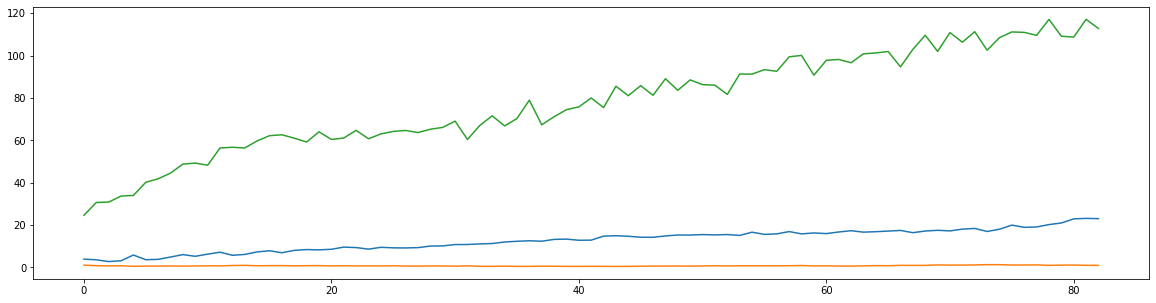

In [91]:
plt.plot(p1)
plt.plot(p2)
plt.plot(p3)
plt.show()

In [92]:
final={c[0]:p1,c[1]:p2,c[2]:p3}
final=pd.DataFrame(final)
final.to_csv('Output_2023_01_31.csv')